# Import Important Libraries

In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Load data 

In [108]:
data=pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Explore data

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [112]:
def d_null(data):
    d_null=data.isnull().sum()
    return d_null[d_null>0]
d_null(data)    

total_bedrooms    207
dtype: int64

In [134]:
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [138]:
correlation_matrix = df.corr()

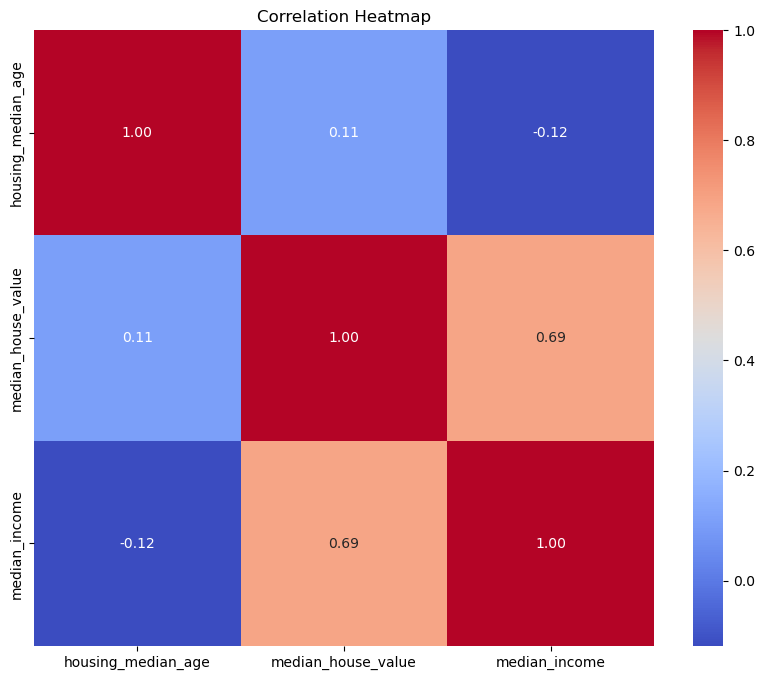

In [139]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [143]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)

In [148]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

Comparison of Models:
               Model  R-Squared  Mean Squared Error
0  Linear Regression   0.494061        6.629874e+09
1      Random Forest   0.427052        7.507956e+09


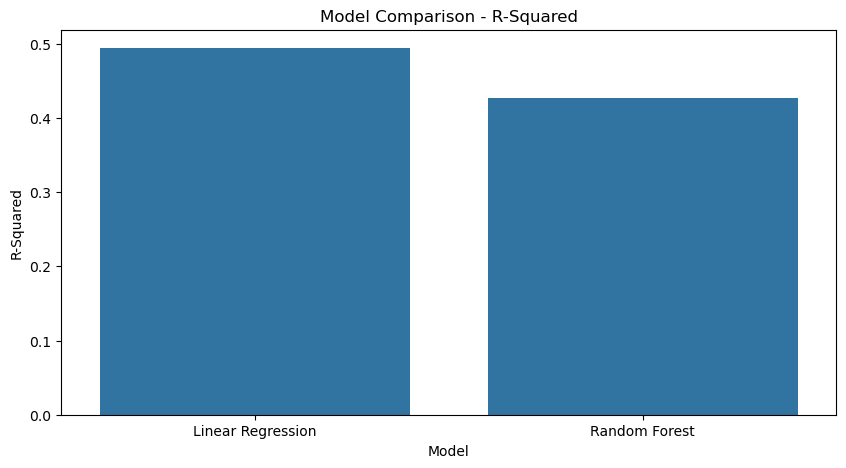

In [154]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R-Squared": [r2_linear, r2_rf],
    "Mean Squared Error": [mse_linear, mse_rf]
    })
print("Comparison of Models:")
print(results)
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="R-Squared", data=results)
plt.title("Model Comparison - R-Squared")
plt.show()

In [ ]:
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
print

RandomForestRegressor(random_state=42)

In [162]:
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [163]:
print("Model Testing Results (20% test data):")

Model Testing Results (20% test data):


In [164]:
print("Linear Regression - MSE:", mse_linear, ", R^2:", r2_linear)
print("Random Forest - MSE:", mse_rf, ", R^2:", r2_rf)

Linear Regression - MSE: 6629874283.048178 , R^2: 0.4940606792889837
Random Forest - MSE: 7507955792.177114 , R^2: 0.427052476223428


In [165]:
y_pred_linear_train = linear_model.predict(X_train)
y_pred_linear_test = linear_model.predict(X_test)
r2_linear_train = r2_score(y_train, y_pred_linear_train)
r2_linear_test = r2_score(y_test, y_pred_linear_test)
mse_linear = mean_squared_error(y_test, y_pred_linear_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear_test)

In [167]:
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)
r2_rf_train = r2_score(y_train, y_pred_rf_train)
r2_rf_test = r2_score(y_test, y_pred_rf_test)
mse_rf = mean_squared_error(y_test, y_pred_rf_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf_test)
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R-Squared (Test)": [r2_linear_test, r2_rf_test],
    "Train Score (R-Squared)": [r2_linear_train, r2_rf_train],
    "Mean Squared Error (Test)": [mse_linear, mse_rf],
    "Mean Absolute Error (Test)": [mae_linear, mae_rf]
})

# Display the table
print("Model Evaluation Metrics Table:")
print(results)

Model Evaluation Metrics Table:
               Model  R-Squared (Test)  Train Score (R-Squared)  \
0  Linear Regression          0.494061                 0.512779   
1      Random Forest          0.427052                 0.909559   

   Mean Squared Error (Test)  Mean Absolute Error (Test)  
0               6.629874e+09                60597.800519  
1               7.507956e+09                63646.556471  


C:\Users\STUDENT\AppData\Local\Temp\ipykernel_12688\1053789150.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R-Squared (Test)", data=df_metrics, palette="Blues_d")
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_12688\1053789150.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Train Score (R-Squared)", data=df_metrics, palette="Blues_d")
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_12688\1053789150.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Mean Squared Error (Test)", data=df_metr

<Figure size 1200x600 with 0 Axes>

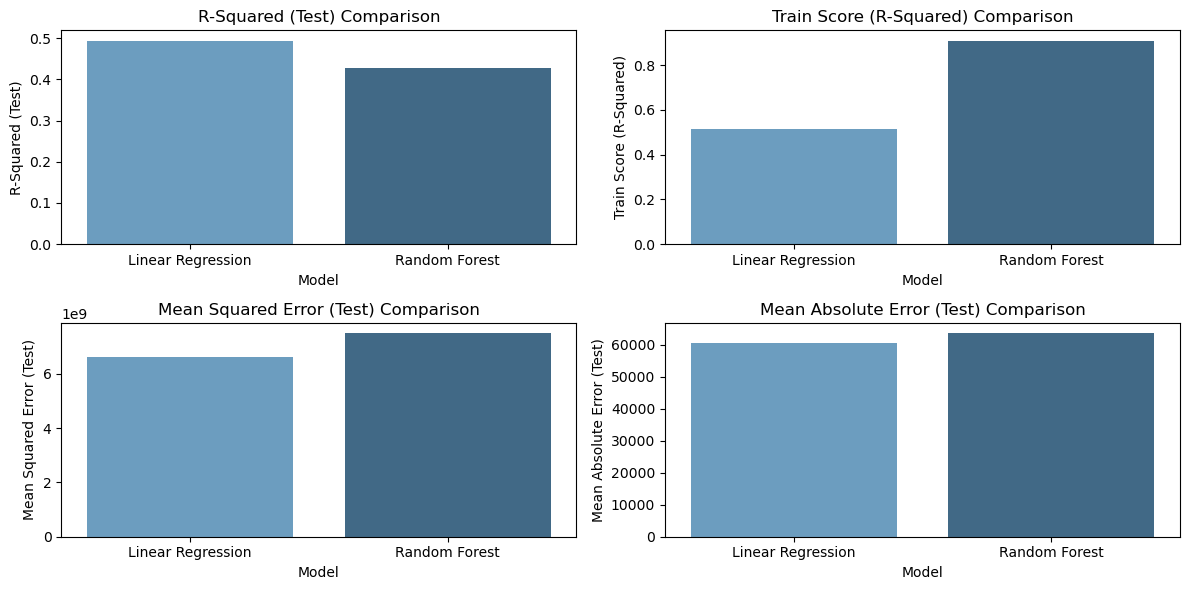

In [173]:
metrics = {
    "Model": ["Linear Regression", "Random Forest"],
    "R-Squared (Test)": [0.494061, 0.427052],
    "Train Score (R-Squared)": [0.512779, 0.909559],
    "Mean Squared Error (Test)": [6.629874e+09, 7.507956e+09],
    "Mean Absolute Error (Test)": [60597.800519, 63646.556471]
}
df_metrics = pd.DataFrame(metrics)
plt.figure(figsize=(12, 6))
df_metrics = pd.DataFrame(metrics)
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.barplot(x="Model", y="R-Squared (Test)", data=df_metrics, palette="Blues_d")
plt.title("R-Squared (Test) Comparison")
plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="Train Score (R-Squared)", data=df_metrics, palette="Blues_d")
plt.title("Train Score (R-Squared) Comparison")
plt.subplot(2, 2, 3)
sns.barplot(x="Model", y="Mean Squared Error (Test)", data=df_metrics, palette="Blues_d")
plt.title("Mean Squared Error (Test) Comparison")
plt.subplot(2, 2, 4)
sns.barplot(x="Model", y="Mean Absolute Error (Test)", data=df_metrics, palette="Blues_d")
plt.title("Mean Absolute Error (Test) Comparison")
plt.tight_layout()
plt.show()

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_12688\830444597.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R-Squared (Test)", data=df_metrics, palette="Blues_d")
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_12688\830444597.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Train Score (R-Squared)", data=df_metrics, palette="Blues_d")
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_12688\830444597.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Mean Squared Error (Test)", data=df_metrics

<Figure size 1200x600 with 0 Axes>

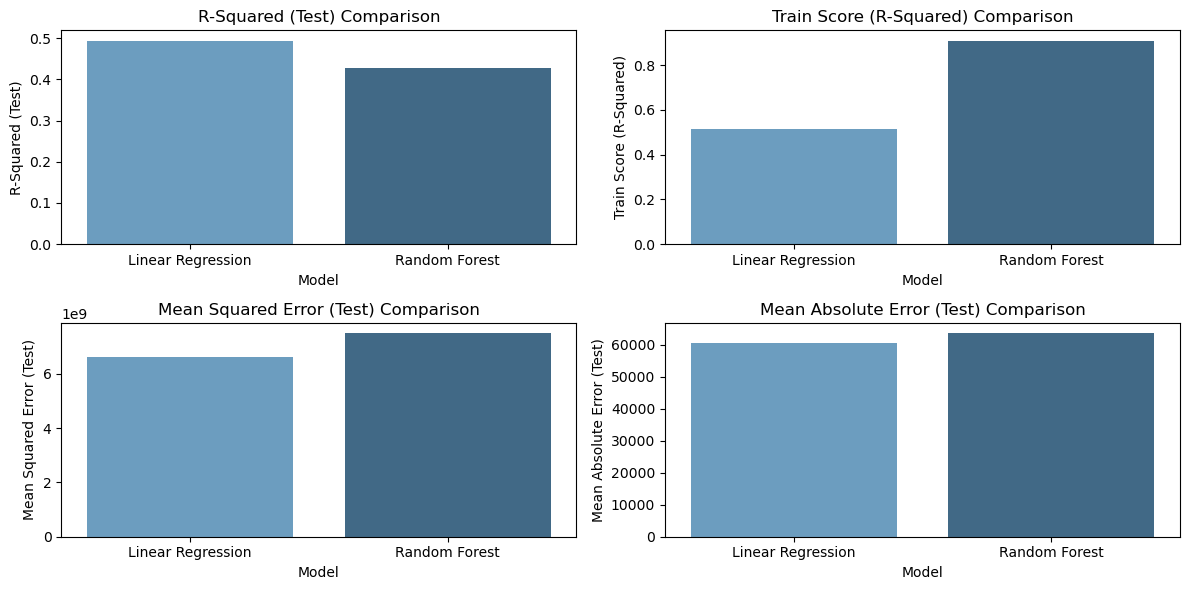

In [172]:
metrics = {
    "Model": ["Linear Regression", "Random Forest"],
    "R-Squared (Test)": [0.494061, 0.427052],
    "Train Score (R-Squared)": [0.512779, 0.909559],
    "Mean Squared Error (Test)": [6.629874e+09, 7.507956e+09],
    "Mean Absolute Error (Test)": [60597.800519, 63646.556471]
}
plt.figure(figsize=(12, 6))
# Convert the metrics into a DataFrame
df_metrics = pd.DataFrame(metrics)

# Plotting the bar chart for R-Squared values
plt.figure(figsize=(12, 6))

# Bar Chart for R-Squared (Test) and Train Score (R-Squared)
plt.subplot(2, 2, 1)
sns.barplot(x="Model", y="R-Squared (Test)", data=df_metrics, palette="Blues_d")
plt.title("R-Squared (Test) Comparison")

# Bar Chart for Train Score (R-Squared)
plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="Train Score (R-Squared)", data=df_metrics, palette="Blues_d")
plt.title("Train Score (R-Squared) Comparison")

# Bar Chart for Mean Squared Error (Test)
plt.subplot(2, 2, 3)
sns.barplot(x="Model", y="Mean Squared Error (Test)", data=df_metrics, palette="Blues_d")
plt.title("Mean Squared Error (Test) Comparison")

# Bar Chart for Mean Absolute Error (Test)
plt.subplot(2, 2, 4)
sns.barplot(x="Model", y="Mean Absolute Error (Test)", data=df_metrics, palette="Blues_d")
plt.title("Mean Absolute Error (Test) Comparison")

# Display all charts
plt.tight_layout()
plt.show()

In [115]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# Data Cleaning

In [116]:
data[data['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


# EDA 

In [117]:
for col in  data.columns:
    print(col,':',data[col].nunique())

longitude : 844
latitude : 862
housing_median_age : 52
total_rooms : 5926
total_bedrooms : 1923
population : 3888
households : 1815
median_income : 12928
median_house_value : 3842
ocean_proximity : 5


In [118]:
for col in  data.columns:
    print(col,':',data[col].unique())
    print('-----------------------------------------------------------------------------------------')

longitude : [-122.23 -122.22 -122.24 -122.25 -122.26 -122.27 -122.28 -122.29 -122.3
 -122.21 -122.2  -122.19 -122.18 -122.13 -122.16 -122.17 -122.15 -122.14
 -122.12 -122.33 -122.34 -122.06 -122.07 -122.08 -122.09 -122.1  -122.11
 -122.03 -121.97 -122.02 -122.04 -122.05 -121.99 -122.01 -121.96 -121.98
 -122.   -121.93 -121.94 -121.95 -121.92 -121.89 -121.91 -121.9  -121.88
 -121.87 -121.85 -121.86 -121.84 -121.82 -121.77 -121.62 -121.61 -121.72
 -121.73 -121.75 -121.8  -121.76 -121.78 -121.79 -119.78 -119.93 -120.
 -120.56 -120.59 -120.55 -120.25 -120.79 -120.8  -120.65 -120.76 -120.88
 -120.69 -120.93 -120.97 -120.87 -120.98 -120.72 -120.77 -120.66 -120.62
 -120.71 -121.83 -121.81 -121.74 -121.68 -121.54 -121.51 -121.59 -121.58
 -121.6  -121.63 -121.57 -121.65 -121.64 -121.71 -121.66 -121.56 -121.5
 -121.41 -121.39 -121.24 -121.19 -121.36 -121.46 -121.49 -121.44 -121.47
 -121.53 -121.52 -121.55 -121.67 -121.69 -121.7  -120.46 -120.54 -120.67
 -120.9  -120.91 -120.57 -120.43 -120.42 -1

In [119]:
for col in  data.columns:
    print(col,':',data[col].value_counts())
    print('-------------------------------------------')

longitude : longitude
-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
          ... 
-123.54      1
-115.94      1
-115.99      1
-116.81      1
-123.71      1
Name: count, Length: 844, dtype: int64
-------------------------------------------
latitude : latitude
34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
41.01      1
41.36      1
41.13      1
40.30      1
35.88      1
Name: count, Length: 862, dtype: int64
-------------------------------------------
housing_median_age : housing_median_age
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10

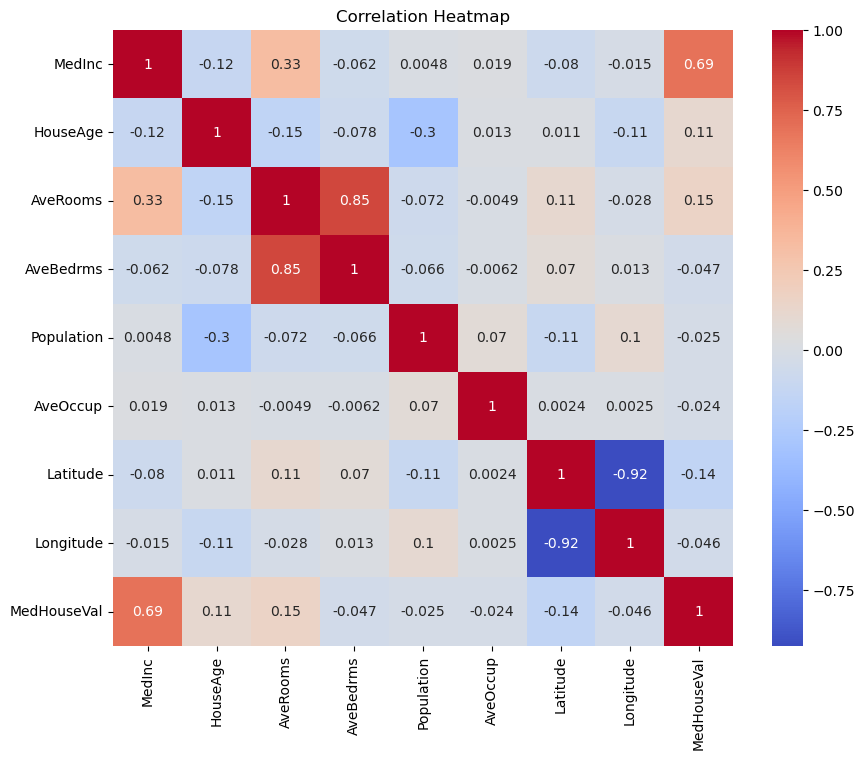

In [120]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
